# Analysis of Car Prices Dataset

Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
DATA_PATH = "./data/CarPrice_Assignment.csv"

data = pd.read_csv(DATA_PATH)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning & Preprocessing

In [3]:
# Drop the car_ID column
data.drop(columns=['car_ID'], inplace=True)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Assuming your DataFrame is named 'data'
data.insert(1, 'carMaker', data['CarName'].apply(lambda x: x.split(' ')[0]))

data.head()

,symboling,carMaker,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Handling entries the same information.

* nissan and Nissan are same
* toyota and toyouta are same 
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

In [5]:
car_maker_dict = {
    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen",
}

data["carMaker"] = data["carMaker"].replace(car_maker_dict)

In [6]:
"maxda" in data["carMaker"].values

False

In [7]:
data[data["carMaker"] == "toyouta"]

,symboling,carMaker,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Exploratory Data Analysis

In [8]:
data.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# check for missing values
data.isnull().sum()

symboling           0
carMaker            0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

no missing values


Getting some information about the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carMaker          205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Visualizing the data

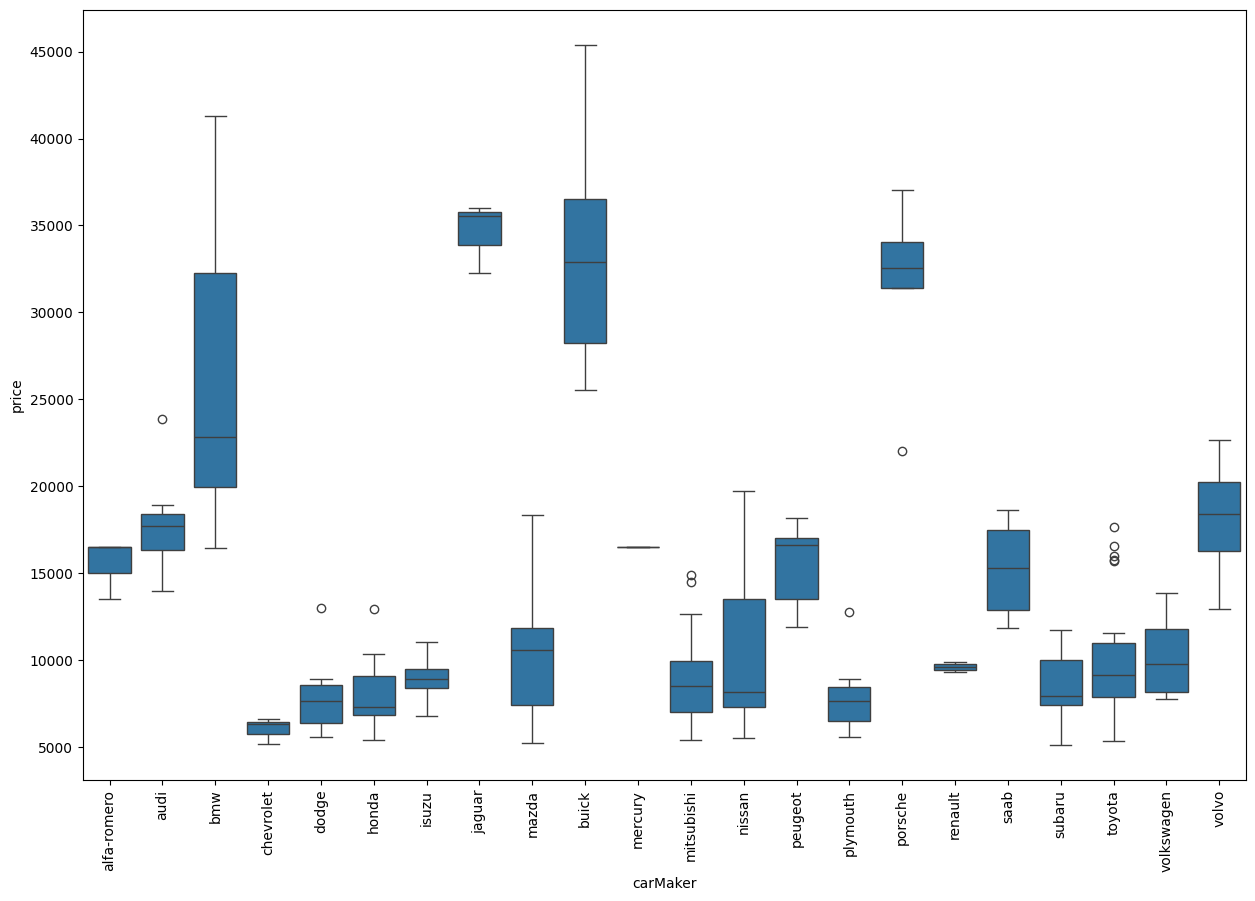

In [11]:
# Plot the average car prices by car maker using a boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x="carMaker", y="price")
plt.xticks(rotation=90)
plt.show()


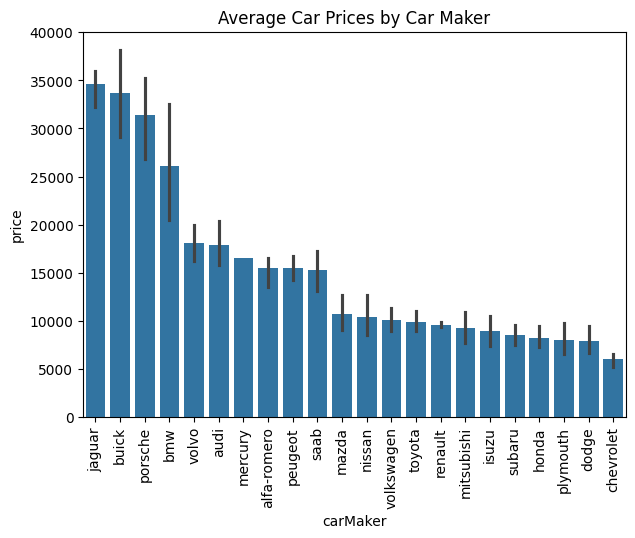

In [12]:
# Sort the DataFrame by average price in descending order
avg_prices = data.groupby("carMaker")["price"].mean().sort_values(ascending=False).index

# Plot the average car prices by car maker using a barplot
# in decreasing order of average price

plt.figure(figsize=(7, 5))
sns.barplot(data=data, x="carMaker", y="price", estimator=np.mean, order=avg_prices)
plt.xticks(rotation=90)
plt.title("Average Car Prices by Car Maker")
plt.show()



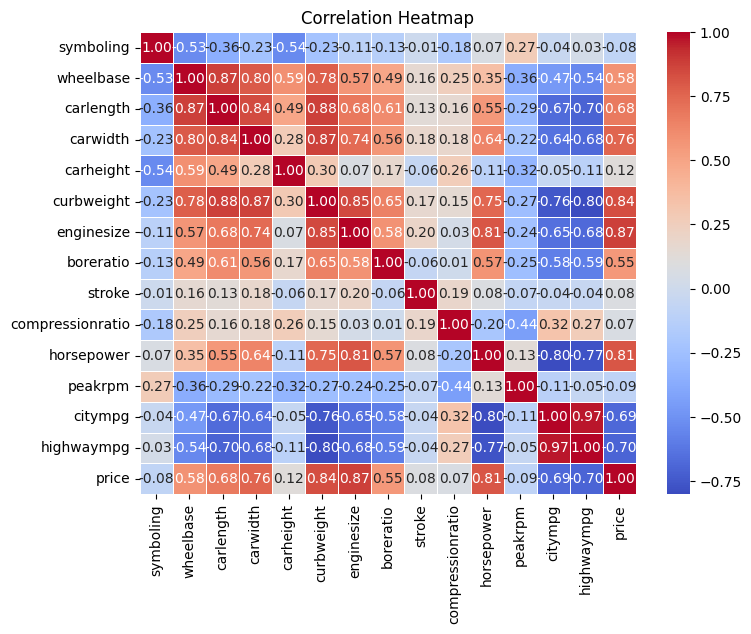

In [13]:
correlation_matrix = data.corr(numeric_only=True) 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

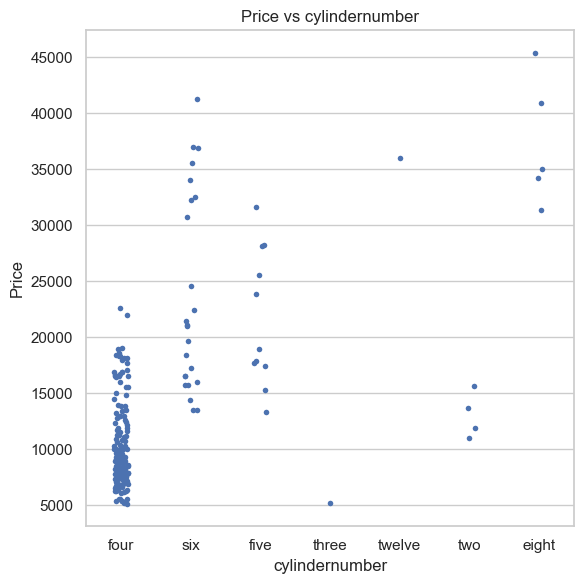

In [14]:
# Select the categorical column we want to compare with "price"
categorical_column = "cylindernumber"

# Create a strip plot for the categorical column
sns.set(style="whitegrid")  # Optional: Set the plot style
fig, ax = plt.subplots(figsize=(6, 6))

sns.stripplot(x=categorical_column, y="price", data=data, size=4, ax=ax)
ax.set_title(f"Price vs {categorical_column}")
ax.set_xlabel(categorical_column)
ax.set_ylabel("Price")

plt.tight_layout()
plt.show()


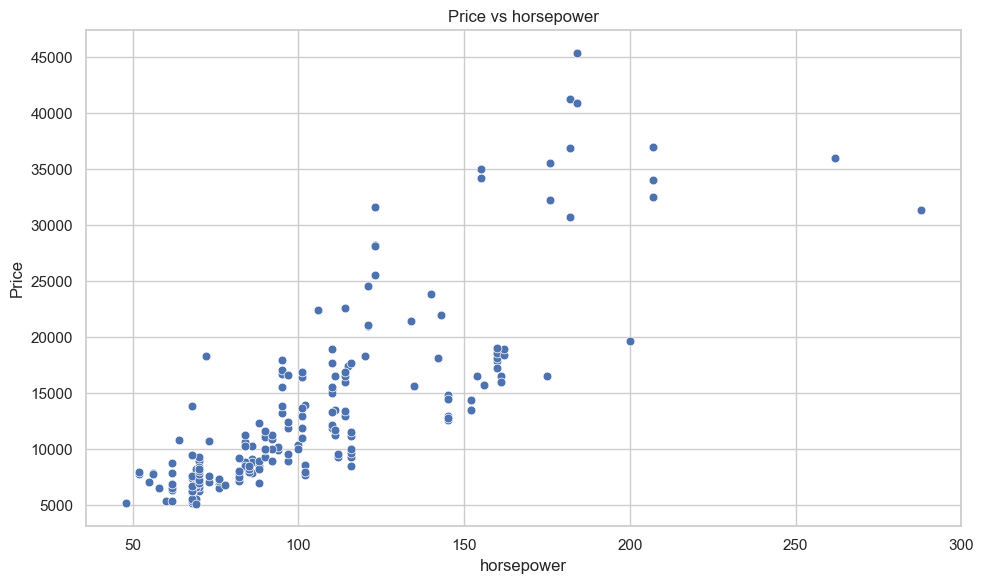

In [15]:
# Select the categorical column we want to compare with "price"
categorical_column = "horsepower"

# Create a scatter plot for the categorical column
sns.set(style="whitegrid")  # Optional: Set the plot style
fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted figsize for better visibility

sns.scatterplot(x=categorical_column, y="price", data=data, s=40, ax=ax)  # Use sns.scatterplot instead of sns.stripplot
ax.set_title(f"Price vs {categorical_column}")
ax.set_xlabel(categorical_column)
ax.set_ylabel("Price")

plt.tight_layout()
plt.show()


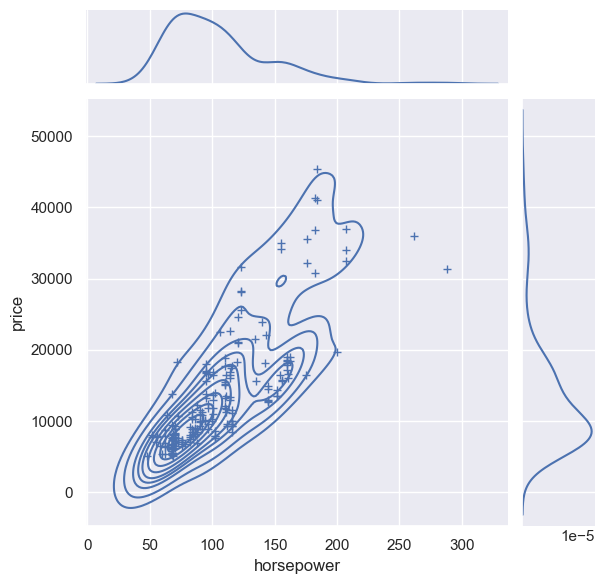

In [19]:
#set the theme darkgrid
sns.set(style="darkgrid")
g = sns.jointplot(x="horsepower", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
# g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

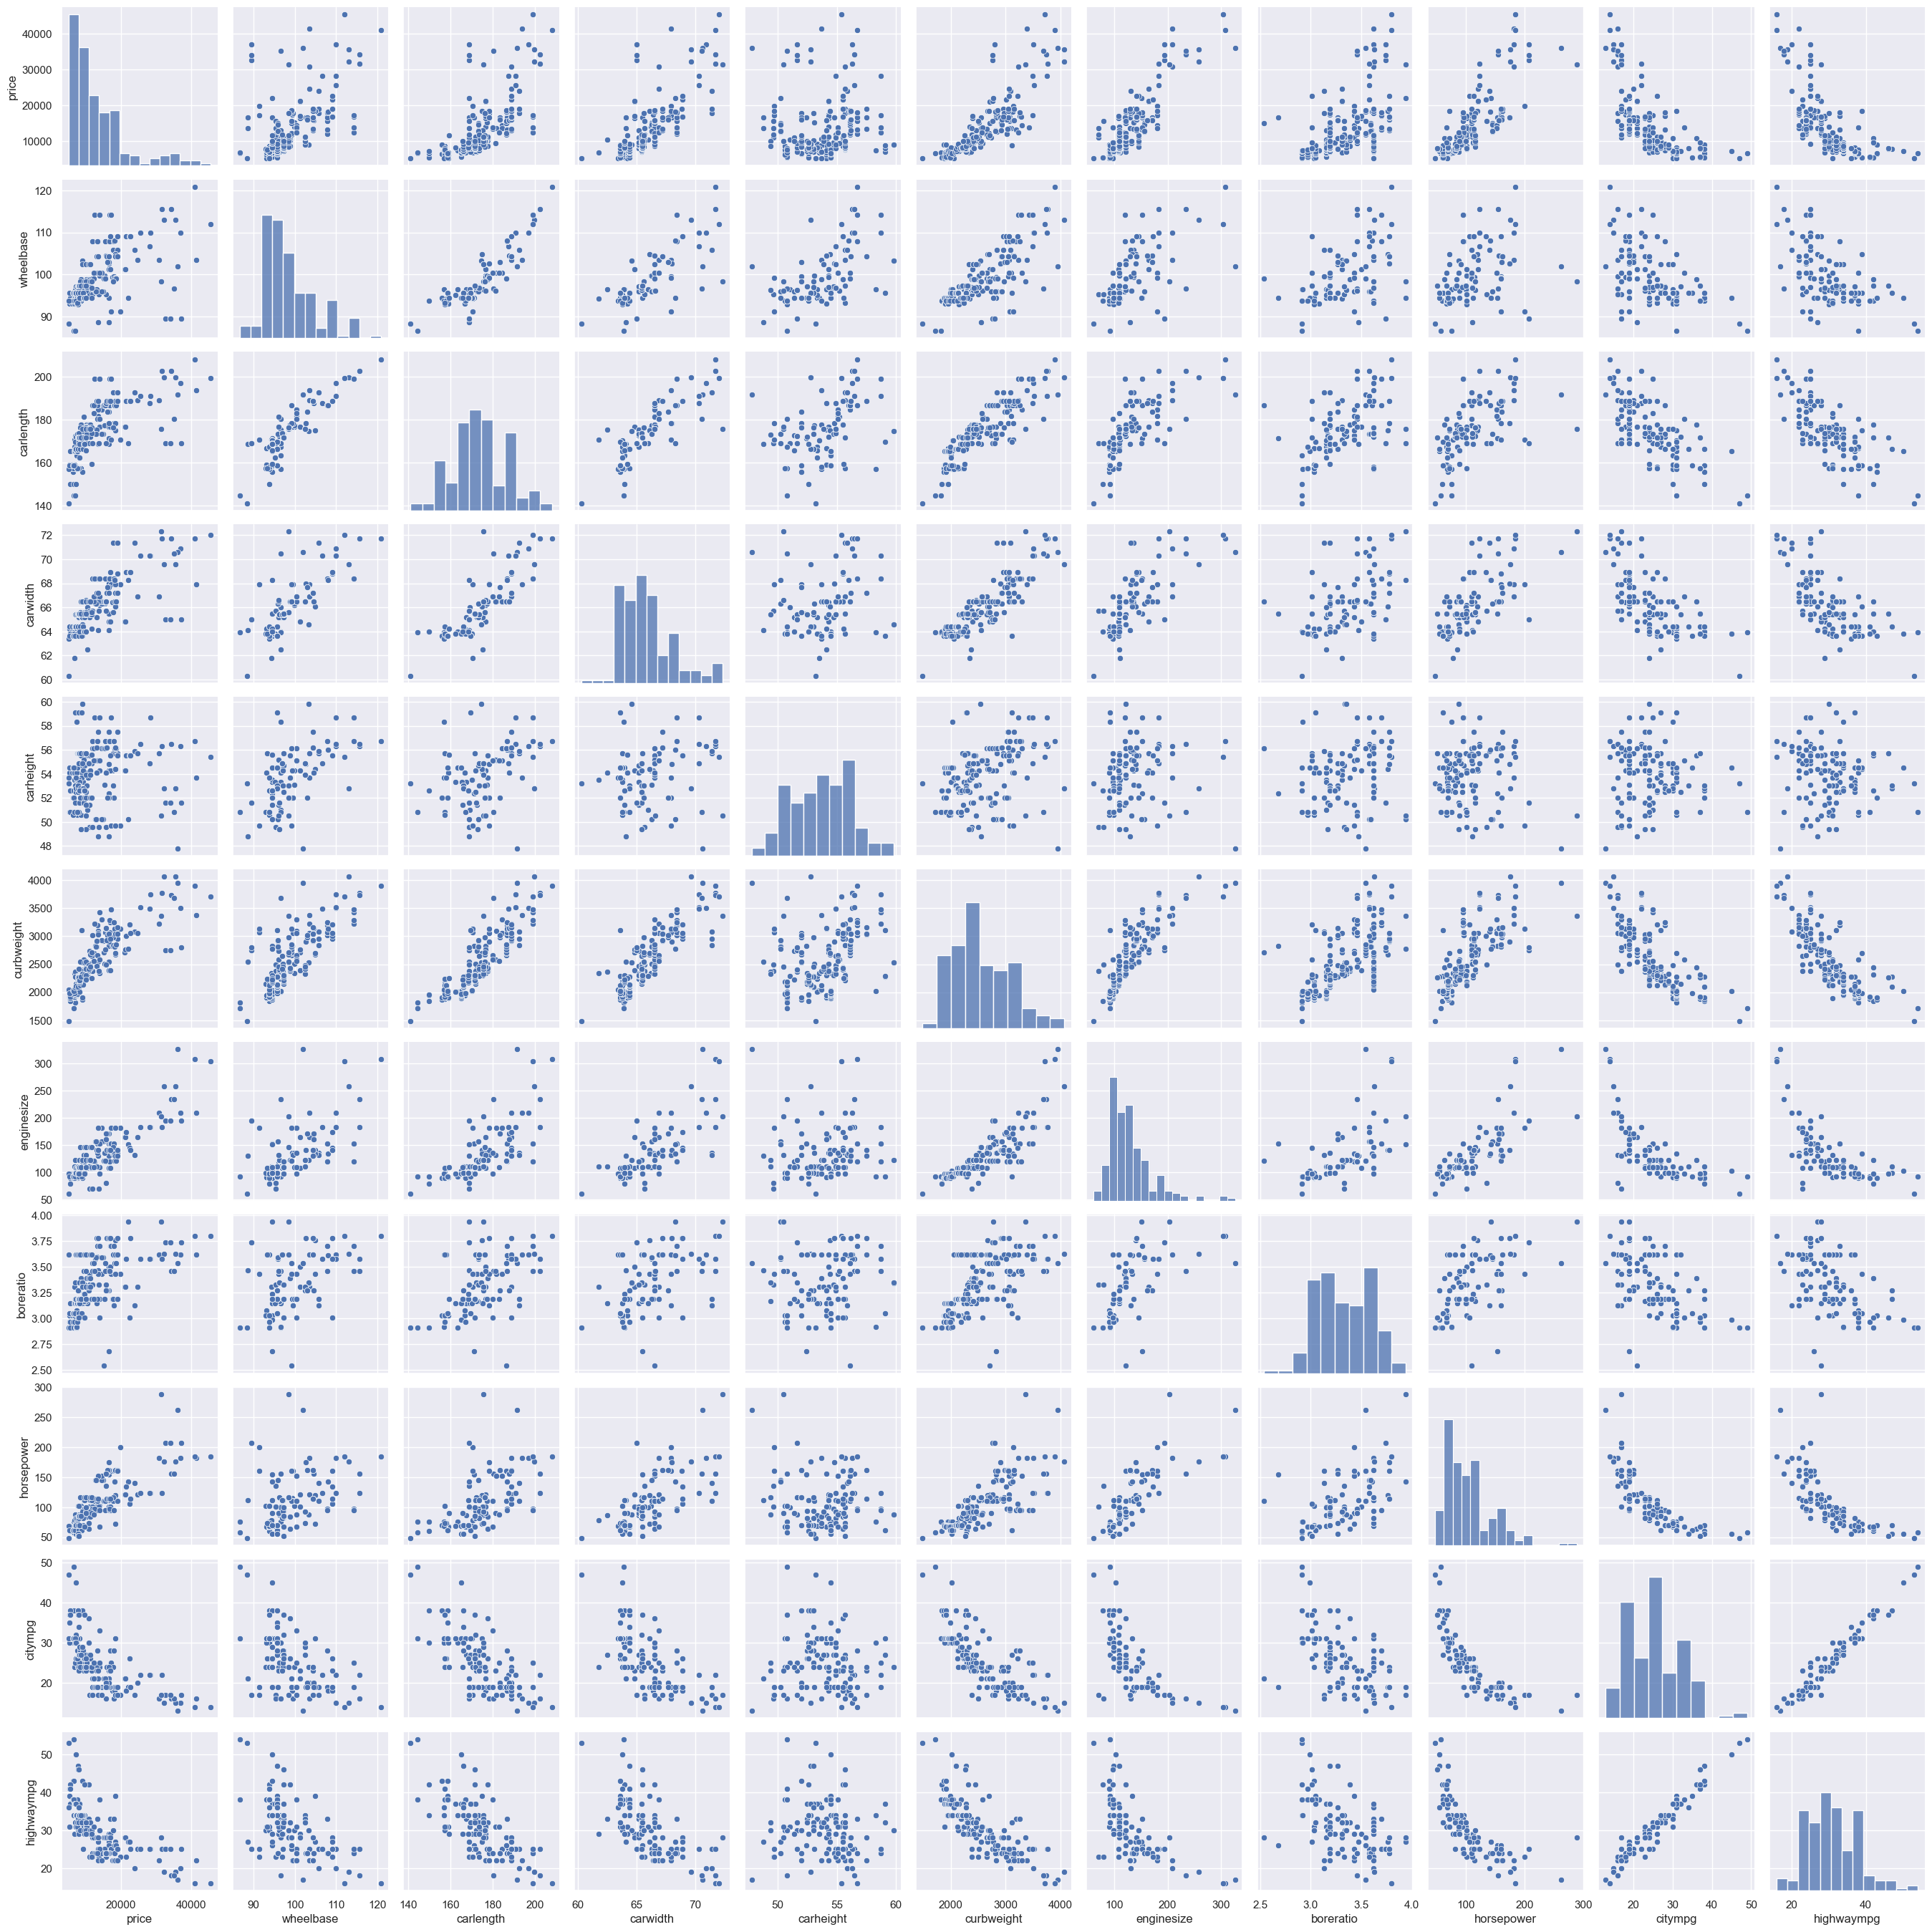

In [20]:
selected_columns = ["price", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "horsepower", "citympg", "highwaympg"]
ax = sns.pairplot(data[selected_columns])

In [ ]:
# Done.